<a href="https://colab.research.google.com/github/AzadShahvaladov/portfolio_projects/blob/main/Data_scraping_from_job_site_and_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saytda olan əmək haqqılar və onların miqdarı:
'100 - 200 AZN ':1
'1000 - 1200 AZN ':2
'500 - 700 AZN ':3
'400 - 800 AZN ':4
'800 - 1200 AZN ':5
'800 - 1000 AZN ':6
'1000 - 1500 AZN ':7
'400 - 500 AZN ':10
'300 - 400 AZN ':18
' Ə/h razılaşma ilə ':168
Saytda olan vakansiyaların hansı şirkətlərə aid olması və miqdarı:
' Hellojob':1
' Lütfizadə Tədris Mərkəzi':2
' PASHA Life':3
' Poppy Gallery':4
' Araznet MMC':5
' Xalq Bank':6
' PASHA Insurance':9
'':15
' ABB ASC':16
' Güvənli MMC':19
' PASHA Bank':28
' Kapital Bank':48


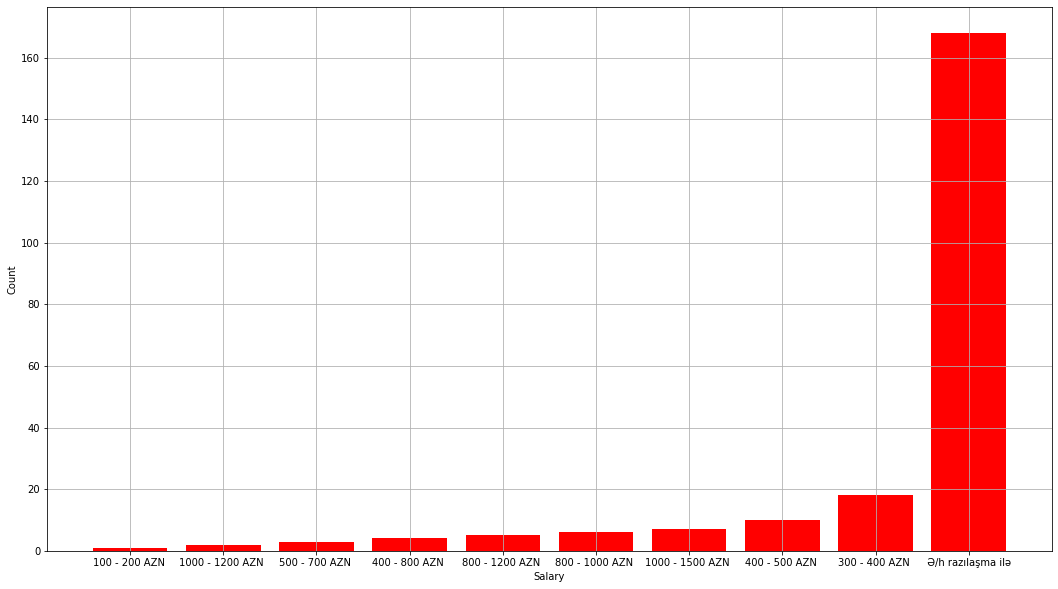

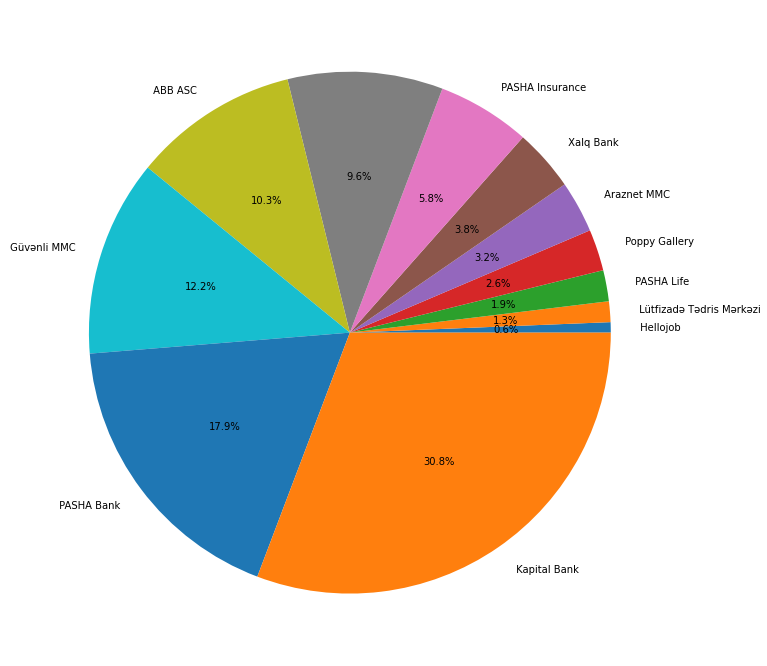

In [ ]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

total_salaries = []
all_companies = []
page_number = 1

while True:
    url = 'https://www.hellojob.az/vakansiyalar/' + str(page_number)
    page_number += 1

    headers = {
        'accept': '*/*',
        'user-agent': 'Mozilla/5.0 (Linux; Android 8.0.0; SM-G955U Build/R16NW) '
                      'AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Mobile Safari/537.36'
    }

    req = requests.get(url, headers=headers)
    src = req.text
    soup = BeautifulSoup(src, 'lxml')
    all_jobs_hrefs = soup.find_all(class_="salary")
    companies_href = soup.find_all(class_="company_name")

    if len(all_jobs_hrefs) == 0:
        break

    for item in all_jobs_hrefs:
        total_salaries.append(item.text)

    for name in companies_href:
        all_companies.append(name.text)

salaries_dict = {}
companies_dict = {}

for company in all_companies:
    if company in companies_dict:
        companies_dict[company] += 1
    else:
        companies_dict[company] = 1

for salary in total_salaries:
    if salary in salaries_dict:
        salaries_dict[salary] += 1
    else:
        salaries_dict[salary] = 1

sorted_values = sorted(salaries_dict.values())
sorted_dict = {}

for i in sorted_values:
    for k in salaries_dict.keys():
        if salaries_dict[k] == i:
            sorted_dict[k] = salaries_dict[k]
            break

sorted_companies_amount = sorted(companies_dict.values())
sorted_companies_dict = {}

for i in sorted_companies_amount:
    for k in companies_dict.keys():
        if companies_dict[k] == i:
            sorted_companies_dict[k] = companies_dict[k]
            break

print('======================================================================')
print('Saytda olan əmək haqqılar və onların miqdarı:')
for i in sorted_dict:
    print("'%s':%d" % (i, salaries_dict[i]))

print('======================================================================')
print('Saytda olan vakansiyaların hansı şirkətlərə aid olması və miqdarı:')
for i in sorted_companies_dict:
    print("'%s':%d" % (i, companies_dict[i]))


def salary_barchar():
    plt.figure(figsize=(18, 10))
    plt.bar(list(sorted_dict.keys()), list(sorted_dict.values()), color="red")
    plt.title("")
    plt.xlabel("Salary")
    plt.ylabel("Count")
    plt.grid()
    plt.savefig("salary.png")


def companies_piechar():
    plt.figure(figsize=(18, 12))
    plt.pie(sorted_companies_dict.values(), labels=sorted_companies_dict.keys(), autopct='%1.1f%%')
    plt.savefig("companies.png")


salary_barchar()
companies_piechar()